In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
from arch.bootstrap import StationaryBootstrap

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
%load_ext autoreload
%autoreload 2

from src.backtesting import BacktestTrader
from src.trading_rules import EWMACRule
from src.utils import get_prices

# bootstrap plotting config
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
# get price data
ticker = ["SPY"]
start_date = "2000-01-01"
end_date = "2004-12-31"

df = get_prices(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [46]:
ewmac = EWMACRule(
    16,
    64,
    ols_window=60
)

ewmac_backtest = BacktestTrader(
    ewmac,
    df,
    commission=0,
    fee_type='percent',
    volatility_target=0.05
)

ewmac_backtest.run_backtest(log=False, position_margin=0.1)


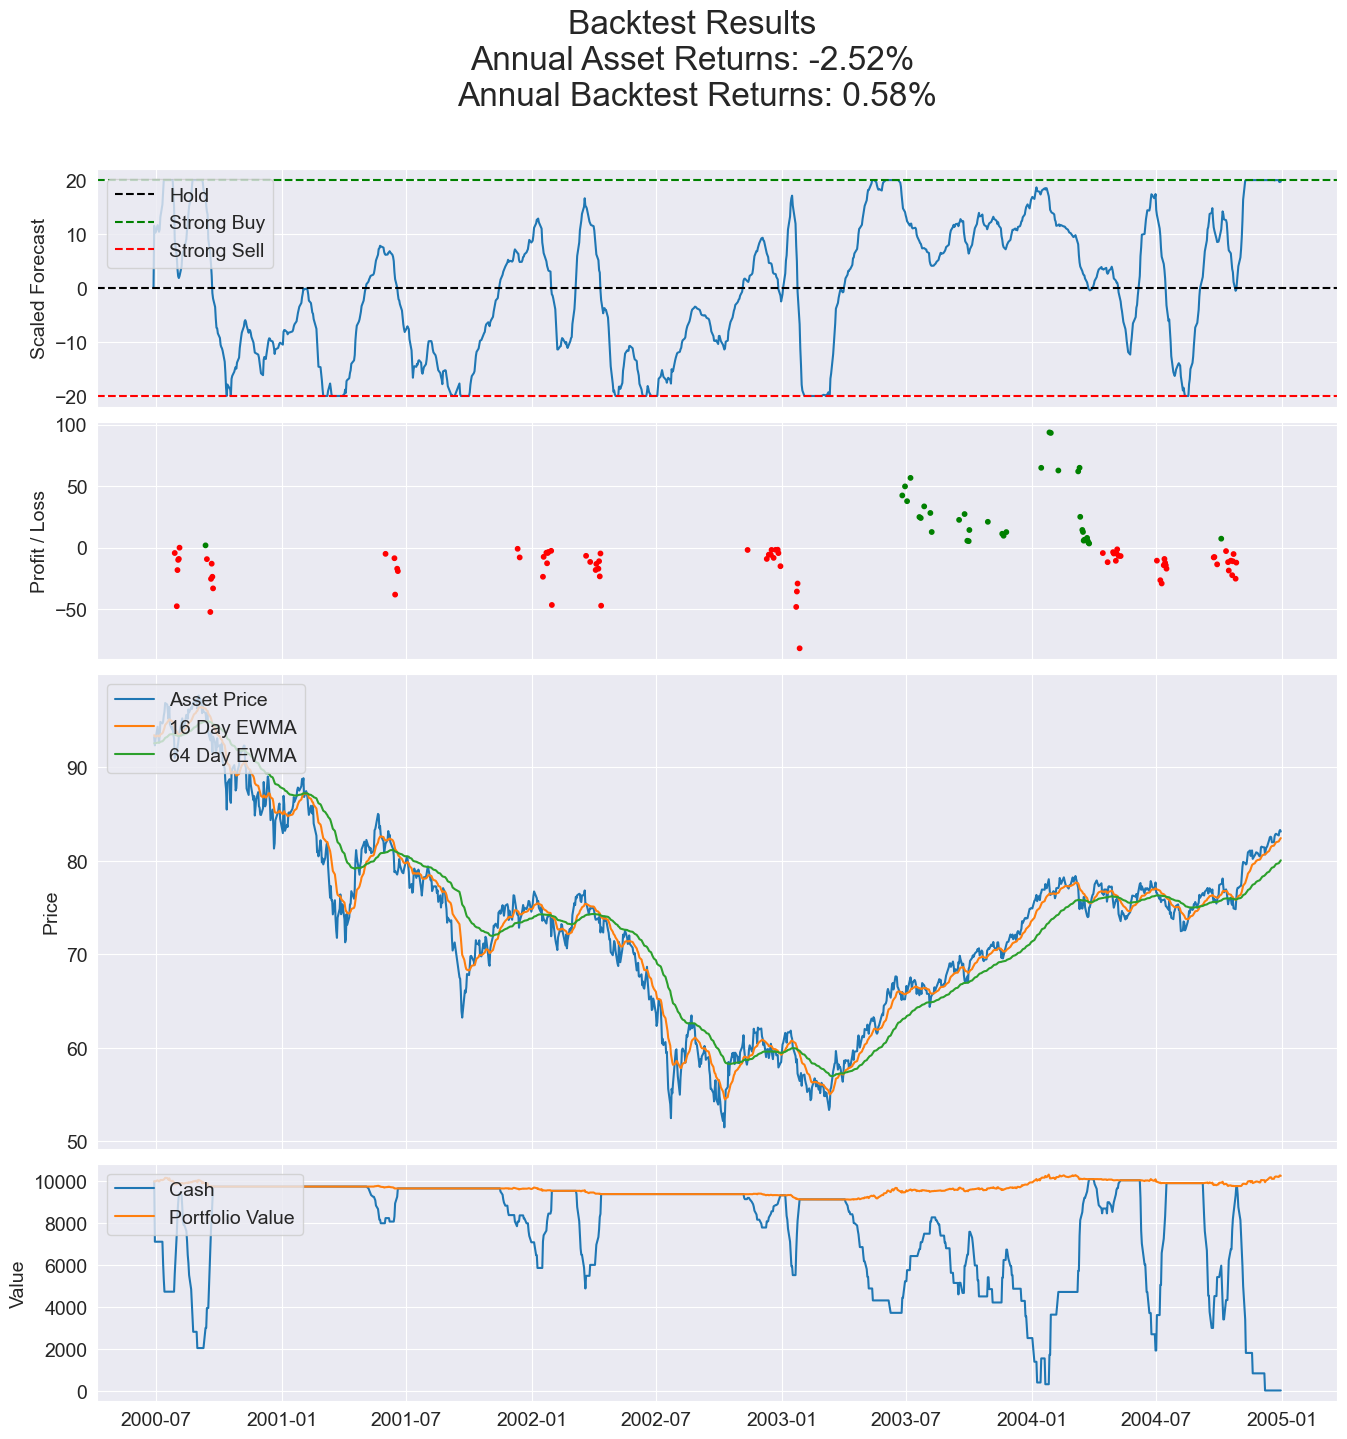

In [56]:
ewmac_backtest.plot_backtest()